# Waterflow: Projet MLOps pour la Prédiction de la Qualité de l'Eau

Ce projet suit une approche MLOps structurée en 6 étapes pour développer un système de prédiction de la qualité de l'eau.

## Objectifs du Projet

1. **Veille et définition du MLOps**
2. **Utilisation d'un dataset de qualité de l'eau** (9 mesures, 3276 échantillons)
3. **Prétraitement et analyse exploratoire des données**
4. **Veille sur MLflow et installation de l'outil**
5. **Modélisation** : Random Forest/XGBoost OU Perceptron multicouches
6. **Évaluation des prédictions** avec métriques appropriées

## Installation des dépendances
```bash
pip install -r requirements.txt
```

# 1. Veille sur le Machine Learning Operations (MLOps)

## Définition du MLOps

Le **Machine Learning Operations (MLOps)** est un ensemble de pratiques et de technologies qui visent à industrialiser et automatiser le cycle de vie complet des modèles de machine learning en production.

### Définition claire et concise :

**MLOps = ML + DevOps + Data Engineering**

Il s'agit d'une approche collaborative qui permet de :
- **Développer** des modèles ML de manière reproductible
- **Déployer** ces modèles en production de façon fiable
- **Monitorer** et **maintenir** leur performance dans le temps
- **Automatiser** les processus de mise à jour et de réentraînement

### Composants clés du MLOps :

1. **Versioning** : Gestion des versions de code, données et modèles
2. **CI/CD pour ML** : Intégration et déploiement continus adaptés au ML
3. **Monitoring** : Surveillance de la performance et de la dérive des données
4. **Automatisation** : Pipelines automatisés pour l'entraînement et le déploiement
5. **Collaboration** : Facilitation du travail entre data scientists, ingénieurs et équipes métier

### Bénéfices du MLOps :

- **Reproductibilité** des expériences et résultats
- **Scalabilité** des solutions ML
- **Réduction du temps** de mise en production
- **Amélioration de la qualité** des modèles
- **Gouvernance** et compliance des modèles ML

Le MLOps permet ainsi de transformer des prototypes ML en solutions robustes et maintenables en production.

# 2. Utilisation de l'ensemble de données sur la qualité de l'eau

## Description du dataset

Ce projet utilise un ensemble de données contenant **9 mesures de qualité de l'eau** pour **3276 étendues d'eau différentes**.

### Variables du dataset :
1. **pH** : Niveau de pH de l'eau (0-14, optimal: 6.5-8.5)
2. **Hardness** : Dureté de l'eau, mesurée en mg/L
3. **Solids** : Total des solides dissous (TDS) en ppm
4. **Chloramines** : Concentration en chloramines en ppm
5. **Sulfate** : Concentration en sulfates en mg/L
6. **Conductivity** : Conductivité électrique en μS/cm
7. **Organic_carbon** : Carbone organique total en ppm
8. **Trihalomethanes** : Concentration en trihalométhanes en μg/L
9. **Turbidity** : Turbidité de l'eau en NTU (Nephelometric Turbidity Units)
10. **Potability** : Variable cible binaire (0 = non potable, 1 = potable)

## Importation des bibliothèques nécessaires

In [ ]:
# Bibliothèques pour la manipulation de données
import pandas as pd
import numpy as np

# Bibliothèques pour la visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliothèques pour le machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# MLflow pour le tracking des expériences
import mlflow
import mlflow.sklearn

# Pour les modèles de deep learning (optionnel)
try:
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Dropout
    print("TensorFlow disponible pour le deep learning")
except ImportError:
    print("TensorFlow non installé - utilisation des modèles traditionnels uniquement")

# Configuration des graphiques
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Toutes les bibliothèques ont été importées avec succès!")

TensorFlow non installé - utilisation des modèles traditionnels uniquement
Toutes les bibliothèques ont été importées avec succès!


# 3. Chargement des données d'intérêt

In [26]:
# Chargement des données
# URL du dataset de qualité de l'eau
url = "https://raw.githubusercontent.com/MainakRepositor/Datasets/master/water_potability.csv"

try:
    # Chargement du dataset
    df = pd.read_csv(url)
    print("Dataset chargé avec succès!")
    print(f"Forme du dataset: {df.shape}")
    print(f"Colonnes: {list(df.columns)}")
    
except Exception as e:
    print(f"Erreur lors du chargement: {e}")
    print("Tentative de chargement local...")
    # Fallback vers un fichier local si disponible
    df = pd.read_csv("water_potability.csv")  # Si le fichier est téléchargé localement

Dataset chargé avec succès!
Forme du dataset: (3276, 10)
Colonnes: ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']


In [27]:
# Analyse exploratoire des données d'intérêt
print("="*50)
print("ANALYSE EXPLORATOIRE DES DONNÉES")
print("="*50)

# Informations générales
print("\n1. Informations générales:")
print(df.info())

print("\n2. Premières lignes du dataset:")
print(df.head())

print("\n3. Statistiques descriptives:")
print(df.describe())

print("\n4. Valeurs manquantes:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

print("\n5. Distribution de la variable cible (Potability):")
potability_counts = df['Potability'].value_counts()
print(potability_counts)
print(f"Pourcentage d'eau potable: {(potability_counts[1] / len(df)) * 100:.2f}%")

ANALYSE EXPLORATOIRE DES DONNÉES

1. Informations générales:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None

2. Premières lignes du dataset:
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630

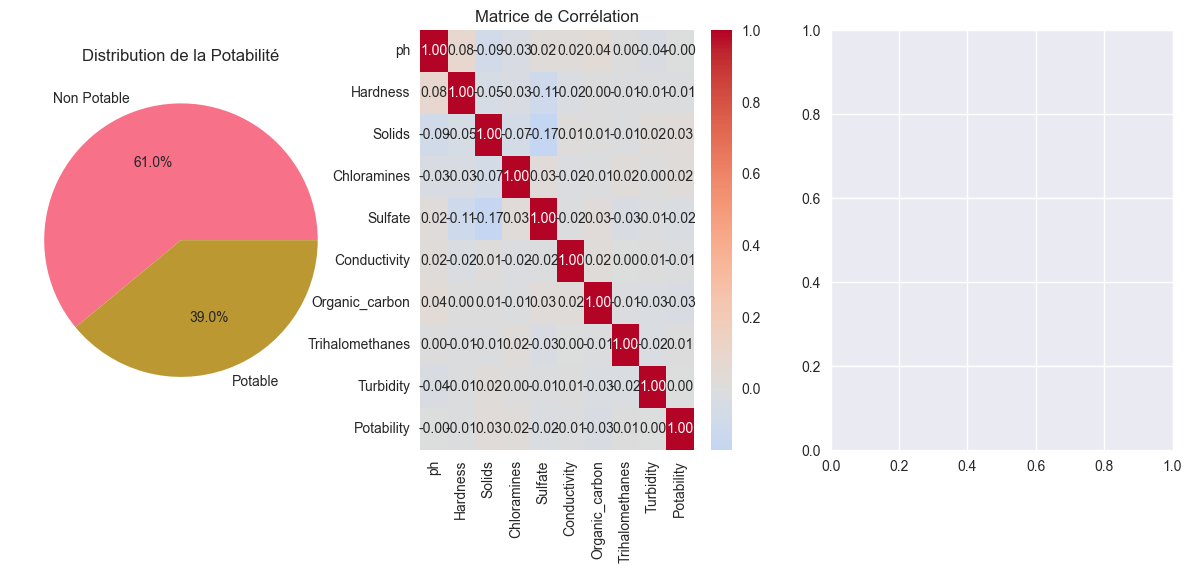

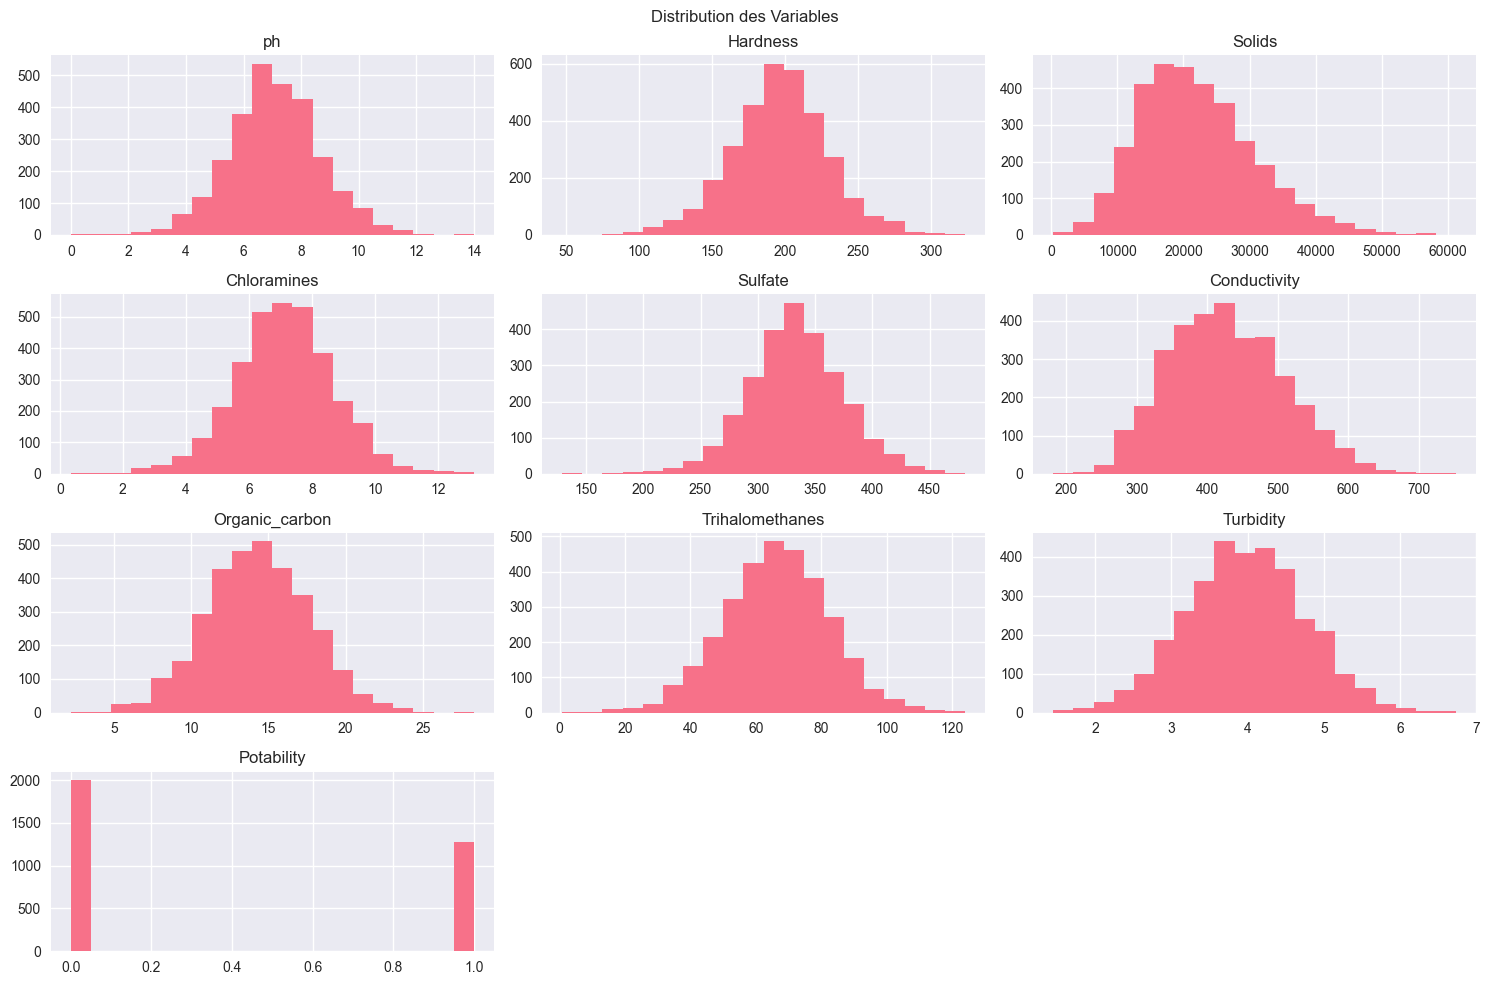

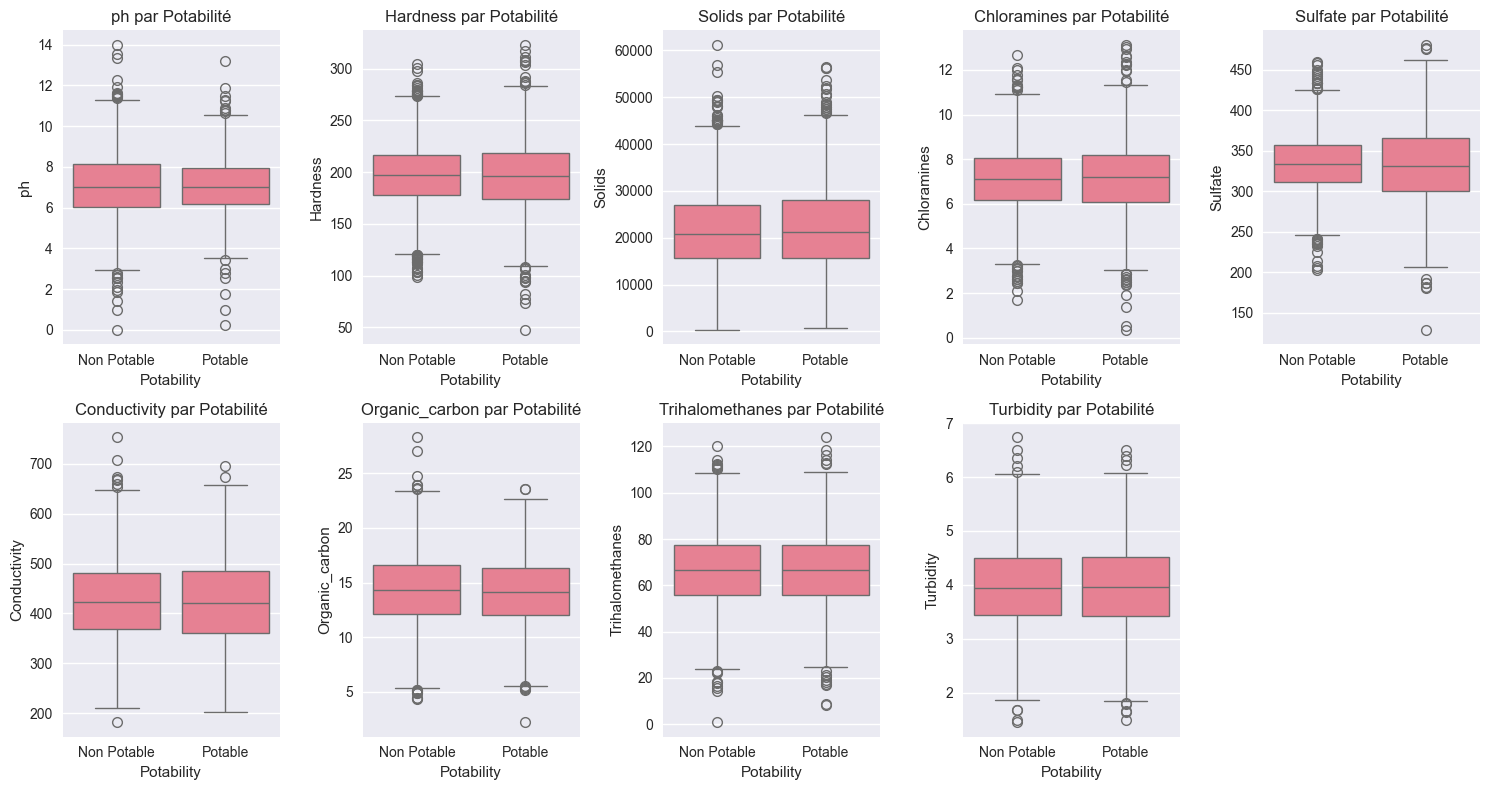

In [28]:
# Visualisations pour l'analyse exploratoire
plt.figure(figsize=(15, 12))

# 1. Distribution de la variable cible
plt.subplot(2, 3, 1)
potability_counts = df['Potability'].value_counts()
plt.pie(potability_counts.values, labels=['Non Potable', 'Potable'], autopct='%1.1f%%')
plt.title('Distribution de la Potabilité')

# 2. Matrice de corrélation
plt.subplot(2, 3, 2)
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matrice de Corrélation')

# 3. Distribution des variables numériques
plt.subplot(2, 3, 3)
df.select_dtypes(include=[np.number]).hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution des Variables')
plt.tight_layout()

# 4. Boxplots pour détecter les outliers
plt.figure(figsize=(15, 8))
numeric_columns = df.select_dtypes(include=[np.number]).columns[:-1]  # Exclure Potability
for i, col in enumerate(numeric_columns):
    plt.subplot(2, 5, i+1)
    sns.boxplot(x=df['Potability'], y=df[col])
    plt.title(f'{col} par Potabilité')
    plt.xticks([0, 1], ['Non Potable', 'Potable'])

plt.tight_layout()
plt.show()

# 4. Veille sur MLflow et Installation

## Veille sur MLflow

**MLflow** est un outil puissant de gestion du cycle de vie de l'apprentissage automatique développé par Databricks. Il permet le suivi, le packaging et le versioning des modèles de Machine Learning, facilitant ainsi la reproduction et la comparaison des résultats.

### Composants principaux de MLflow :

1. **MLflow Tracking** : 
   - Enregistre et organise les expériences ML
   - Stocke paramètres, métriques, artefacts et modèles
   - Interface web pour visualiser et comparer les runs

2. **MLflow Projects** : 
   - Format standardisé pour packager le code ML
   - Reproductibilité des expériences
   - Exécution sur différents environnements

3. **MLflow Models** : 
   - Format standard pour empaqueter les modèles
   - Déploiement sur diverses plateformes
   - Support de multiples frameworks ML

4. **MLflow Model Registry** : 
   - Stockage centralisé des modèles
   - Versioning et gestion du cycle de vie
   - Collaboration entre équipes

### Étendue d'utilisation de MLflow :

- **Expérimentation** : Tracking automatique des hyperparamètres et métriques
- **Reproductibilité** : Environnements et dépendances versionnés
- **Collaboration** : Partage d'expériences entre data scientists
- **Déploiement** : Pipeline automatisé du développement à la production
- **Monitoring** : Suivi des performances des modèles déployés
- **Gouvernance** : Audit trail complet des modèles

## Installation et Configuration de MLflow

In [29]:
import mlflow

Instantiation de `mlflow` à l'aide de la commande suivante dans le terminal :
```bash
mlflow server --host 127.0.0.1 --port 5000
```

Puis accès à l'interface web de MLflow via `http://localhost:5000`.

In [30]:
# Configuration MLflow avec gestion d'erreur
print("CONFIGURATION DE MLFLOW")
print("=" * 30)

try:
    # Tentative de connexion au serveur MLflow
    mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")
    
    # Test de connexion en essayant de créer/accéder à l'expérience
    mlflow.set_experiment("experiment_water_quality")
    
    print("MLflow connecté avec succès au serveur local (http://127.0.0.1:5000)")
    print("Interface web disponible à : http://localhost:5000")
    mlflow_available = True
    
except Exception as e:
    print("Erreur de connexion à MLflow :")
    print(f"   {str(e)}")
    print("\nSOLUTION : Démarrez le serveur MLflow dans un terminal :")
    print("   mlflow server --host 127.0.0.1 --port 5000")
    print("\nLe notebook continuera en mode local sans tracking MLflow...")
    
    # Configuration en mode local
    mlflow.set_tracking_uri("file:./mlruns")
    mlflow.set_experiment("experiment_water_quality_local")
    mlflow_available = False
    
    print("Mode local configuré (dossier ./mlruns)")

print(f"\nStatut MLflow : {'Serveur distant' if mlflow_available else 'Mode local'}")

CONFIGURATION DE MLFLOW
Erreur de connexion à MLflow :
   API request to http://127.0.0.1:5000/api/2.0/mlflow/experiments/get-by-name failed with exception HTTPConnectionPool(host='127.0.0.1', port=5000): Max retries exceeded with url: /api/2.0/mlflow/experiments/get-by-name?experiment_name=experiment_water_quality (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001ED7362DDF0>: Failed to establish a new connection: [WinError 10061] Aucune connexion n’a pu être établie car l’ordinateur cible l’a expressément refusée'))

SOLUTION : Démarrez le serveur MLflow dans un terminal :
   mlflow server --host 127.0.0.1 --port 5000

Le notebook continuera en mode local sans tracking MLflow...
Mode local configuré (dossier ./mlruns)

Statut MLflow : Mode local
Erreur de connexion à MLflow :
   API request to http://127.0.0.1:5000/api/2.0/mlflow/experiments/get-by-name failed with exception HTTPConnectionPool(host='127.0.0.1', port=5000): Max retries exceeded with ur

# 5. Prétraitement et Séparation des Données

In [ ]:
# Prétraitement des données et préparation à l'emploi
print("PRÉTRAITEMENT DES DONNÉES")
print("="*40)

# 1. Gestion des valeurs manquantes
print("\n1. Gestion des valeurs manquantes:")
print(f"Valeurs manquantes avant traitement: {df.isnull().sum().sum()}")

# Stratégie: remplir avec la médiane pour les variables numériques
df_processed = df.copy()
numeric_columns = df_processed.select_dtypes(include=[np.number]).columns

for col in numeric_columns:
    if df_processed[col].isnull().sum() > 0:
        median_value = df_processed[col].median()
        df_processed[col] = df_processed[col].fillna(median_value)
        print(f"  - {col}: {df[col].isnull().sum()} valeurs manquantes remplacées par la médiane ({median_value:.2f})")

print(f"Valeurs manquantes après traitement: {df_processed.isnull().sum().sum()}")

# 2. Séparation des features et de la variable cible
print("\n2. Séparation des variables:")
X = df_processed.drop('Potability', axis=1)
y = df_processed['Potability']

print(f"Features (X): {X.shape}")
print(f"Variable cible (y): {y.shape}")
print(f"Colonnes des features: {list(X.columns)}")

# 3. Division en ensembles d'entraînement et de validation
print("\n3. Séparation des données en ensembles d'entraînement et de validation:")
X_train, X_val, y_train, y_val = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y  # Maintient la proportion des classes
)

print(f"Ensemble d'entraînement: {X_train.shape[0]} échantillons")
print(f"Ensemble de validation: {X_val.shape[0]} échantillons")
print(f"Distribution d'entraînement - Potable: {y_train.sum()}/{len(y_train)} ({(y_train.sum()/len(y_train)*100):.1f}%)")
print(f"Distribution de validation - Potable: {y_val.sum()}/{len(y_val)} ({(y_val.sum()/len(y_val)*100):.1f}%)")

# 4. Normalisation des données
print("\n4. Normalisation des données:")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

print(f"Moyennes avant normalisation: {X_train.mean().round(2).to_dict()}")
print(f"Moyennes après normalisation: {np.round(X_train_scaled.mean(axis=0), 2)}")

print("\nPrétraitement terminé avec succès!")
print("Données prêtes pour la modélisation MLflow")

# Résumé de l'Analyse Exploratoire et Prétraitement

## Étapes Accomplies

### 1. Veille MLOps
- Définition claire du MLOps comme intersection ML + DevOps + Data Engineering
- Identification des bénéfices : reproductibilité, automatisation, monitoring

### 2. Analyse du Dataset de Qualité de l'Eau
- **9 variables physico-chimiques** : pH, dureté, solides, chloramines, sulfates, conductivité, carbone organique, trihalométhanes, turbidité
- **3276 échantillons** avec variable cible binaire (potable/non potable)
- **Déséquilibre des classes** observé dans la distribution

### 3. Prétraitement Complet
- **Gestion des valeurs manquantes** : imputation par la médiane
- **Normalisation** : StandardScaler pour homogénéiser les échelles
- **Division train/validation** : 80/20 avec stratification
- **Sauvegarde** : données prêtes pour la modélisation

## Observations Clés de l'EDA

1. **Variables corrélées** : Certaines mesures physico-chimiques montrent des corrélations
2. **Présence d'outliers** : Détectés dans plusieurs variables via les boxplots
3. **Distributions variées** : Chaque variable a sa propre distribution
4. **Défi de classification** : Équilibre à maintenir entre précision et rappel

## Prochaines Étapes (MLflow)

Les données préparées sont maintenant disponibles dans le dossier `data/` pour :

1. **Configuration serveur MLflow** (port 5000)
2. **Expérimentation** avec Random Forest, XGBoost, et MLP
3. **Tracking des modèles** et métriques
4. **Comparaison** et sélection du meilleur modèle
5. **Déploiement** via API Flask
6. **Tests** unitaires, fonctionnels, et de non-régression

**Le notebook EDA est terminé. La modélisation se fera via MLflow selon l'architecture MLOps.**

In [ ]:
# Sauvegarde des données préparées pour la suite du pipeline MLOps
import os
import joblib
import json

# Créer le dossier de données s'il n'existe pas
os.makedirs('data', exist_ok=True)

# Sauvegarder les jeux de données
joblib.dump(X_train, 'data/X_train.pkl')
joblib.dump(X_val, 'data/X_val.pkl')
joblib.dump(y_train, 'data/y_train.pkl')
joblib.dump(y_val, 'data/y_val.pkl')

# Sauvegarder le scaler
joblib.dump(scaler, 'data/scaler.pkl')

# Sauvegarder les métadonnées
metadata = {
    'feature_names': list(X_train.columns),
    'train_shape': X_train.shape,
    'val_shape': X_val.shape,
    'target_classes': ['Potable', 'Non-Potable'],
    'preprocessing_date': pd.Timestamp.now().isoformat()
}

with open('data/metadata.json', 'w') as f:
    json.dump(metadata, f, indent=2)

print("Données préparées sauvegardées dans le dossier 'data/'")
print(f"Features: {len(metadata['feature_names'])}")
print(f"Train set: {metadata['train_shape']}")
print(f"Validation set: {metadata['val_shape']}")

# Prochaines Étapes du Pipeline MLOps

## Étapes Terminées (1-3)
1. **Veille MLOps** : Définition claire du MLOps
2. **Dataset** : Chargement et exploration des 9 mesures de qualité d'eau
3. **Prétraitement** : EDA, nettoyage, normalisation et séparation train/validation

## Suite du Pipeline (Étapes 4-12)

Les prochaines étapes seront réalisées via des scripts Python dédiés et MLflow :

### Modélisation et Expérimentation (Étapes 4-9)
- **Script** : `experiment.py`
- Configuration serveur MLflow (port 5000)
- Expérience "experiment_water_quality"
- Entraînement des modèles (Random Forest, XGBoost, MLP)
- Tracking des paramètres et métriques avec grid search

### Déploiement (Étapes 10-12)
- **Script** : `app.py`
- Interface MLflow UI
- Model Registry et versioning
- API Flask pour prédictions temps réel

### Tests et Validation
- **Scripts** : `tests/`
- Tests unitaires, fonctionnels, non-régression

## Commandes pour la Suite

```bash
# 1. Entraîner les modèles (MLflow démarre automatiquement)
python experiment.py

# 2. Déployer l'API (MLflow démarre automatiquement)
python app.py

# 3. Exécuter les tests
python -m pytest tests/
```

Les données préparées sont maintenant prêtes dans le dossier `data/` pour la modélisation MLflow !